## Data Sources: Uniform Crime Report
* **2016 Data**: Table 3 - Crime in the United States by State, 2016. Retrieved from the FBI Uniform Crime Reporting (UCR) Program:
https://ucr.fbi.gov/crime-in-the-u.s/2016/crime-in-the-u.s.-2016/tables/table-3

* **2020 Data**: Table 5 - Crime in the United States by State, 2020. Available via the FBI Crime Data Explorer:
https://cde.ucr.cjis.gov/LATEST/webapp/#

In [44]:
import pandas as pd
import data_prep_functions as prep

In [45]:
spotlite = prep.aggregate_spotlite_to_state_long('Data/SPOTLITE.csv')
spotlite

,STATE,STATE_NAME,YEAR,USE_OF_FORCE_COUNT
0,AK,Alaska,2016,14
1,AK,Alaska,2020,20
2,AL,Alabama,2016,51
3,AL,Alabama,2020,75
4,AR,Arkansas,2016,35
...,...,...,...,...
97,WI,Wisconsin,2016,36
98,WV,West Virginia,2020,22
99,WV,West Virginia,2016,24
100,WY,Wyoming,2016,4


In [46]:
crimes_2016 = prep.extract_state_total_crime('Data/table-3.xlsx')
crimes_2020 = prep.extract_state_total_crime('Data/Table_05_Crime_in_the_United_States_by_State_2020.xlsx')

In [47]:
crimes = pd.concat([crimes_2016, crimes_2020])
crimes

3,STATE,YEAR,POPULATION,TOTAL_CRIME
0,AK,2016,741894,30842
1,AL,2016,4863300,169248
2,AR,2016,2988248,114134
3,AZ,2016,6931071,239015
4,CA,2016,39250017,1176866
...,...,...,...,...
46,VT,2020,623347,8667
47,WA,2020,7693612,232819
48,WI,2020,5832655,105515
49,WV,2020,1784787,31328


In [48]:
lemas_2016 = prep.read_lemas('Data/LEMAS2016.tsv')
lemas_2020 = prep.read_lemas('Data/LEMAS2020.tsv')

166 rows dropped due to FTSWORN <=0 or invalid demographic counts.
909 rows dropped due to FTSWORN <=0 or invalid demographic counts.


In [49]:
lemas = pd.concat([lemas_2020, lemas_2016])
lemas

,STATE,YEAR,FTSWORN,%_FEMALE,%_BLACK,%_HISP,CCRB,CFDBK_POLICY,AG_STATE,AG_SHERIFF,AG_LOCAL,PERS_FEMALE,PERS_BLACK_FEM,PERS_BLACK_MALE,PERS_HISP_FEM,PERS_HISP_MALE
0,AK,2020,286,0.080420,0.038462,0.055944,0.017483,0.017483,0,0,0,23,0,11,1,15
1,AL,2020,5623,0.092299,0.273164,0.012271,0.187444,0.572648,0,0,0,519,260,1276,4,65
2,AR,2020,3098,0.114913,0.122014,0.034538,0.193996,0.599419,0,0,0,356,73,305,19,88
3,AZ,2020,8751,0.113244,0.032111,0.205919,0.180322,0.736830,0,0,0,991,29,252,230,1572
4,CA,2020,60466,0.139103,0.059025,0.346840,0.514570,0.817832,0,0,0,8411,594,2975,3817,17155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,VT,2016,429,0.102564,0.009324,0.006993,0.731935,0.000000,1,3,9,44,1,3,0,3
47,WA,2016,5019,0.110181,0.041243,0.045228,0.402869,0.321578,1,5,31,553,25,182,19,208
48,WI,2016,6067,0.164332,0.080765,0.059502,0.395747,0.021757,1,16,66,997,108,382,51,310
49,WV,2016,1265,0.035573,0.024506,0.005534,0.004743,0.066403,1,3,19,45,2,29,1,6


In [50]:
merged = lemas.merge(crimes, on=['STATE', 'YEAR'], how='left')
data = merged.merge(spotlite, on=['STATE', 'YEAR'], how='left')

In [51]:
data

,STATE,YEAR,FTSWORN,%_FEMALE,%_BLACK,%_HISP,CCRB,CFDBK_POLICY,AG_STATE,AG_SHERIFF,AG_LOCAL,PERS_FEMALE,PERS_BLACK_FEM,PERS_BLACK_MALE,PERS_HISP_FEM,PERS_HISP_MALE,POPULATION,TOTAL_CRIME,STATE_NAME,USE_OF_FORCE_COUNT
0,AK,2020,286,0.080420,0.038462,0.055944,0.017483,0.017483,0,0,0,23,0,11,1,15,731158,22654,Alaska,20
1,AL,2020,5623,0.092299,0.273164,0.012271,0.187444,0.572648,0,0,0,519,260,1276,4,65,4921532,127483,Alabama,75
2,AR,2020,3098,0.114913,0.122014,0.034538,0.193996,0.599419,0,0,0,356,73,305,19,88,3030522,99563,Arkansas,50
3,AZ,2020,8751,0.113244,0.032111,0.205919,0.180322,0.736830,0,0,0,991,29,252,230,1572,7421401,201303,Arizona,121
4,CA,2020,60466,0.139103,0.059025,0.346840,0.514570,0.817832,0,0,0,8411,594,2975,3817,17155,39368078,1016080,California,435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,VT,2016,429,0.102564,0.009324,0.006993,0.731935,0.000000,1,3,9,44,1,3,0,3,624594,11591,Vermont,2
98,WA,2016,5019,0.110181,0.041243,0.045228,0.402869,0.321578,1,5,31,553,25,182,19,208,7288000,276676,Washington,55
99,WI,2016,6067,0.164332,0.080765,0.059502,0.395747,0.021757,1,16,66,997,108,382,51,310,5778708,129399,Wisconsin,36
100,WV,2016,1265,0.035573,0.024506,0.005534,0.004743,0.066403,1,3,19,45,2,29,1,6,1831102,44044,West Virginia,24


In [52]:
data.describe()

,YEAR,FTSWORN,%_FEMALE,%_BLACK,%_HISP,CCRB,CFDBK_POLICY,AG_STATE,AG_SHERIFF,AG_LOCAL,PERS_FEMALE,PERS_BLACK_FEM,PERS_BLACK_MALE,PERS_HISP_FEM,PERS_HISP_MALE,POPULATION,TOTAL_CRIME,USE_OF_FORCE_COUNT
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.0,102.0,102.000000
mean,2018.000000,8276.196078,0.120187,0.101813,0.076588,0.298231,0.410669,0.441176,5.558824,19.666667,1168.911765,259.215686,799.666667,233.078431,1057.215686,6398153.294118,166345.45098,59.637255
std,2.009877,11513.986860,0.038637,0.103242,0.096165,0.244279,0.270345,0.498980,8.495279,30.878341,1790.546883,423.396723,1064.908413,636.911883,2758.787966,7273752.789691,198709.704168,69.649020
min,2016.000000,286.000000,0.035573,0.002024,0.003984,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,0.000000,1.000000,0.000000,3.000000,582328.0,8667.0,2.000000
25%,2016.000000,1679.250000,0.089760,0.022385,0.021685,0.130737,0.158487,0.000000,0.000000,0.000000,203.750000,3.000000,40.500000,5.000000,41.500000,1795318.5,41563.5,17.750000
50%,2018.000000,4206.000000,0.115251,0.071154,0.038028,0.244556,0.413532,0.000000,0.000000,0.500000,513.000000,50.000000,282.000000,23.500000,145.500000,4457112.5,120965.0,43.000000
75%,2020.000000,9275.000000,0.143206,0.131881,0.074665,0.426072,0.631446,1.000000,10.000000,31.000000,1351.250000,349.750000,1231.000000,92.000000,437.250000,7388050.75,200628.25,74.500000
max,2020.000000,60466.000000,0.241183,0.528287,0.517425,1.000000,1.000000,1.000000,40.000000,143.000000,8411.000000,2027.000000,4434.000000,3817.000000,17155.000000,39368078.0,1176866.0,435.000000


In [95]:
# Calculate Lethal Force Rate by Residents or Crimes
def standardize(series: pd.Series) -> pd.Series:
    return (series - series.min()) / (series.max() - series.min())

data['%_FORCE_TO_RESIDENT'] = data['USE_OF_FORCE_COUNT'] * 100000 / data['POPULATION']
data['%_FORCE_TO_CRIME'] = data['USE_OF_FORCE_COUNT'] * 1000 / data['TOTAL_CRIME']
data['STD_FORCE_TO_RESIDENT'] = standardize(data['%_FORCE_TO_RESIDENT'])
data['STD_FORCE_TO_CRIME'] = standardize(data['%_FORCE_TO_CRIME'])
data

,STATE,YEAR,FTSWORN,%_FEMALE,%_BLACK,%_HISP,CCRB,CFDBK_POLICY,AG_STATE,AG_SHERIFF,...,PERS_HISP_FEM,PERS_HISP_MALE,POPULATION,TOTAL_CRIME,STATE_NAME,USE_OF_FORCE_COUNT,%_FORCE_TO_RESIDENT,%_FORCE_TO_CRIME,STD_FORCE_TO_RESIDENT,STD_FORCE_TO_CRIME
0,AK,2020,286,0.080420,0.038462,0.055944,0.017483,0.017483,0,0,...,1,15,731158,22654,Alaska,20,2.735387,0.882846,0.796543,0.939867
1,AL,2020,5623,0.092299,0.273164,0.012271,0.187444,0.572648,0,0,...,4,65,4921532,127483,Alabama,75,1.523916,0.588314,0.40864,0.572997
2,AR,2020,3098,0.114913,0.122014,0.034538,0.193996,0.599419,0,0,...,19,88,3030522,99563,Arkansas,50,1.649881,0.502195,0.448973,0.465728
3,AZ,2020,8751,0.113244,0.032111,0.205919,0.180322,0.736830,0,0,...,230,1572,7421401,201303,Arizona,121,1.63042,0.601084,0.442741,0.588904
4,CA,2020,60466,0.139103,0.059025,0.346840,0.514570,0.817832,0,0,...,3817,17155,39368078,1016080,California,435,1.104956,0.428116,0.274492,0.373455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,VT,2016,429,0.102564,0.009324,0.006993,0.731935,0.000000,1,3,...,0,3,624594,11591,Vermont,2,0.320208,0.172548,0.023222,0.05512
98,WA,2016,5019,0.110181,0.041243,0.045228,0.402869,0.321578,1,5,...,19,208,7288000,276676,Washington,55,0.754665,0.198788,0.162332,0.087806
99,WI,2016,6067,0.164332,0.080765,0.059502,0.395747,0.021757,1,16,...,51,310,5778708,129399,Wisconsin,36,0.622977,0.278209,0.120166,0.186732
100,WV,2016,1265,0.035573,0.024506,0.005534,0.004743,0.066403,1,3,...,1,6,1831102,44044,West Virginia,24,1.310686,0.54491,0.340365,0.518933


In [98]:
# Split Data by Year
data_2016 = data[data['YEAR'] == 2016]
data_2020 = data[data['YEAR'] == 2020]

# Hypothesis 1

### Data Preview

In [107]:
data[['%_FEMALE', '%_FORCE_TO_RESIDENT','%_FORCE_TO_CRIME' ,'STD_FORCE_TO_RESIDENT', 'STD_FORCE_TO_CRIME']].describe()

,%_FEMALE,%_FORCE_TO_RESIDENT,%_FORCE_TO_CRIME,STD_FORCE_TO_RESIDENT,STD_FORCE_TO_CRIME
count,102.000000,102.0,102.0,102.0,102.0
mean,0.120187,1.038348,0.397255,0.253165,0.335015
std,0.038637,0.532983,0.170758,0.170657,0.212696
min,0.035573,0.247682,0.128296,0.0,0.0
25%,0.089760,0.677749,0.279163,0.137704,0.187921
50%,0.115251,0.946895,0.362506,0.223882,0.291732
75%,0.143206,1.246136,0.489062,0.319697,0.44937
max,0.241183,3.370809,0.931123,1.0,1.0


Conclusion:

- The mean value of %_FEMALE is 0.12, and the value is between 0.03 to 0.25.

- The mean value of %_FORCE_TO_RESIDENT	is 1.03, and the value is between 0.24 to 3.37.

- The mean value of %_FORCE_TO_CRIME is 0.39, and the value is between 0.12 to 0.93.

- The mean value of STD_FORCE_TO_RESIDENT is 0.25, and the value is between 0.03 to 0.25.

- The mean value of STD_FORCE_TO_CRIME is 0.33.

### Scatter

In [85]:
import matplotlib.pyplot as plt

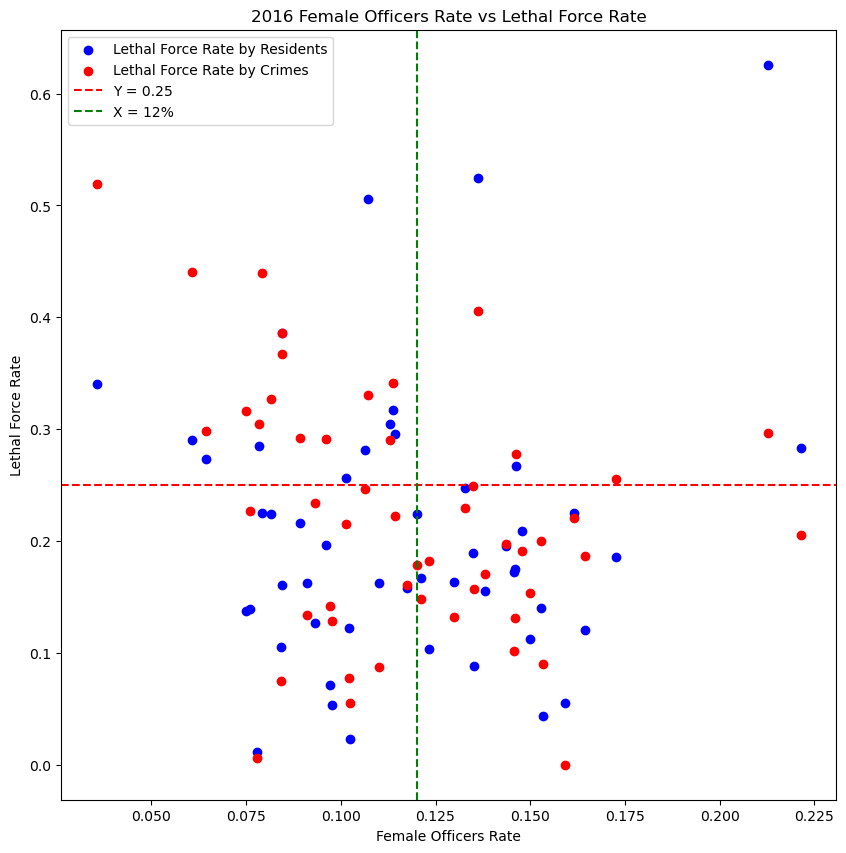

In [108]:
# Figure 1: 2016 Female Officers Rate vs Lethal Force Rate by Residents and Crimes
plt.figure(figsize=(10, 10))
plt.scatter(data_2016['%_FEMALE'], data_2016['STD_FORCE_TO_RESIDENT'], color='blue', label='Lethal Force Rate by Residents')
plt.scatter(data_2016['%_FEMALE'], data_2016['STD_FORCE_TO_CRIME'], color='red', label='Lethal Force Rate by Crimes')
plt.axhline(y=0.25, color='red', linestyle='--', label='Y = 0.25')
plt.axvline(x=0.12, color='green', linestyle='--', label='X = 12%')
plt.xlabel('Female Officers Rate')
plt.ylabel('Lethal Force Rate')
plt.title("2016 Female Officers Rate vs Lethal Force Rate")
plt.legend()
plt.show()

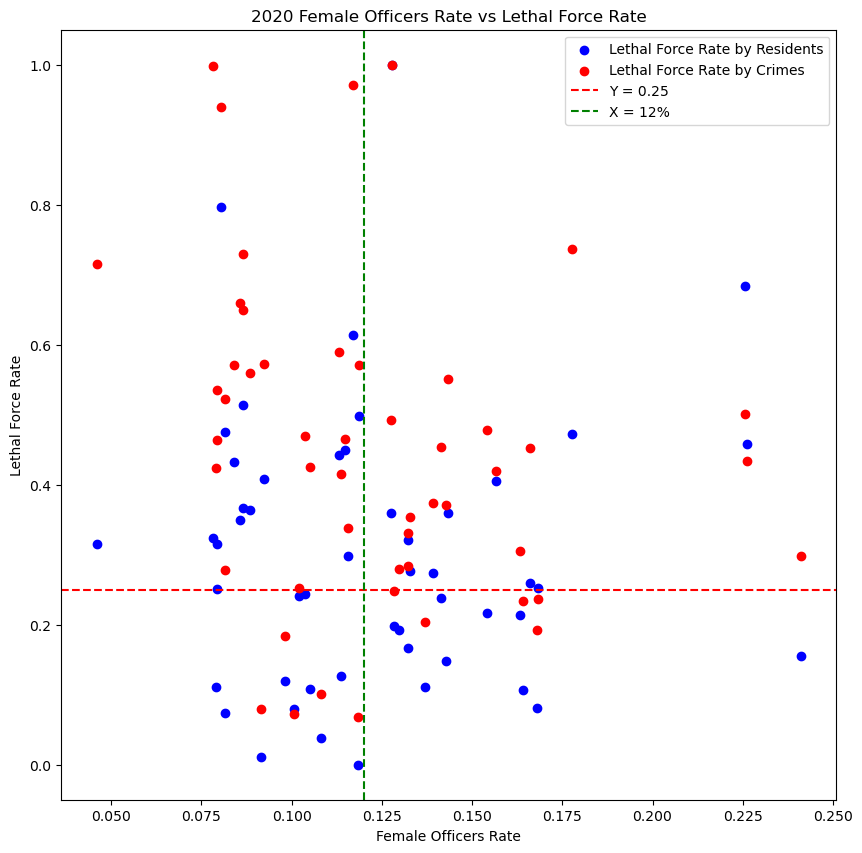

In [109]:
# FIgure 2: 2020 Female Officers Rate vs Lethal Force Rate by Residents and Crimes
plt.figure(figsize=(10, 10))
plt.scatter(data_2020['%_FEMALE'], data_2020['STD_FORCE_TO_RESIDENT'], color='blue', label='Lethal Force Rate by Residents')
plt.scatter(data_2020['%_FEMALE'], data_2020['STD_FORCE_TO_CRIME'], color='red', label='Lethal Force Rate by Crimes')
plt.axhline(y=0.25, color='red', linestyle='--', label='Y = 0.25')
plt.axvline(x=0.12, color='green', linestyle='--', label='X = 12%')
plt.xlabel('Female Officers Rate')
plt.ylabel('Lethal Force Rate')
plt.title("2020 Female Officers Rate vs Lethal Force Rate")
plt.legend()
plt.show()

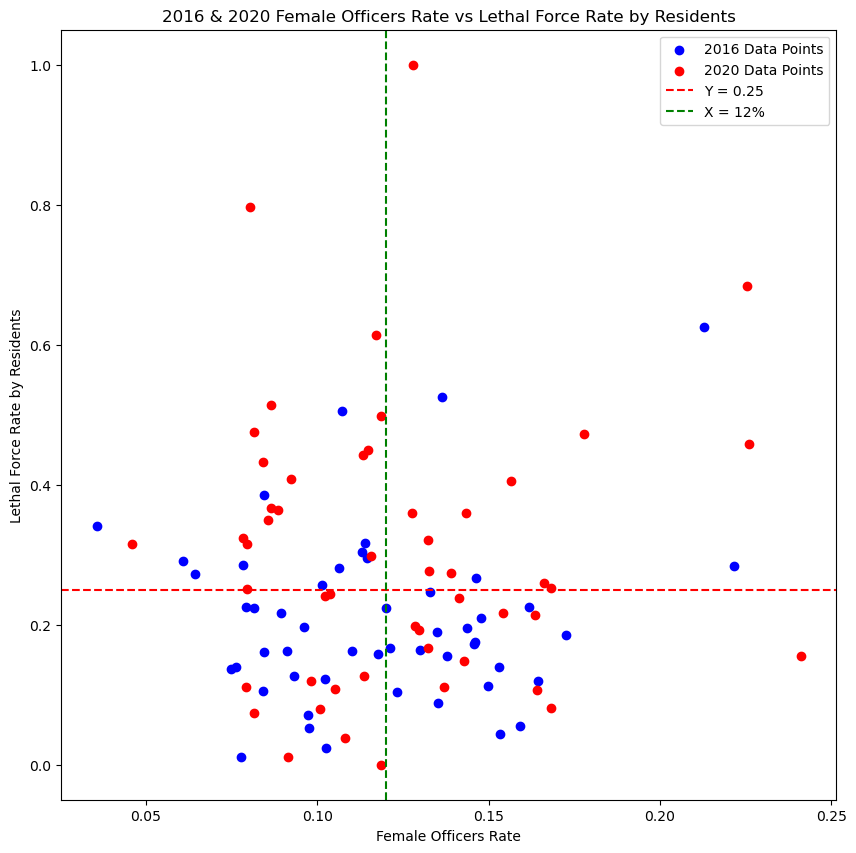

In [110]:
# Figure 3: 2016 & 2020 Female Officers Rate vs Lethal Force Rate by Residents
plt.figure(figsize=(10, 10))
plt.scatter(data_2016['%_FEMALE'], data_2016['STD_FORCE_TO_RESIDENT'], color='blue', label='2016 Data Points')
plt.scatter(data_2020['%_FEMALE'], data_2020['STD_FORCE_TO_RESIDENT'], color='red', label='2020 Data Points')
plt.axhline(y=0.25, color='red', linestyle='--', label='Y = 0.25')
plt.axvline(x=0.12, color='green', linestyle='--', label='X = 12%')
plt.xlabel('Female Officers Rate')
plt.ylabel('Lethal Force Rate by Residents')
plt.title("2016 & 2020 Female Officers Rate vs Lethal Force Rate by Residents")
plt.legend()
plt.show()

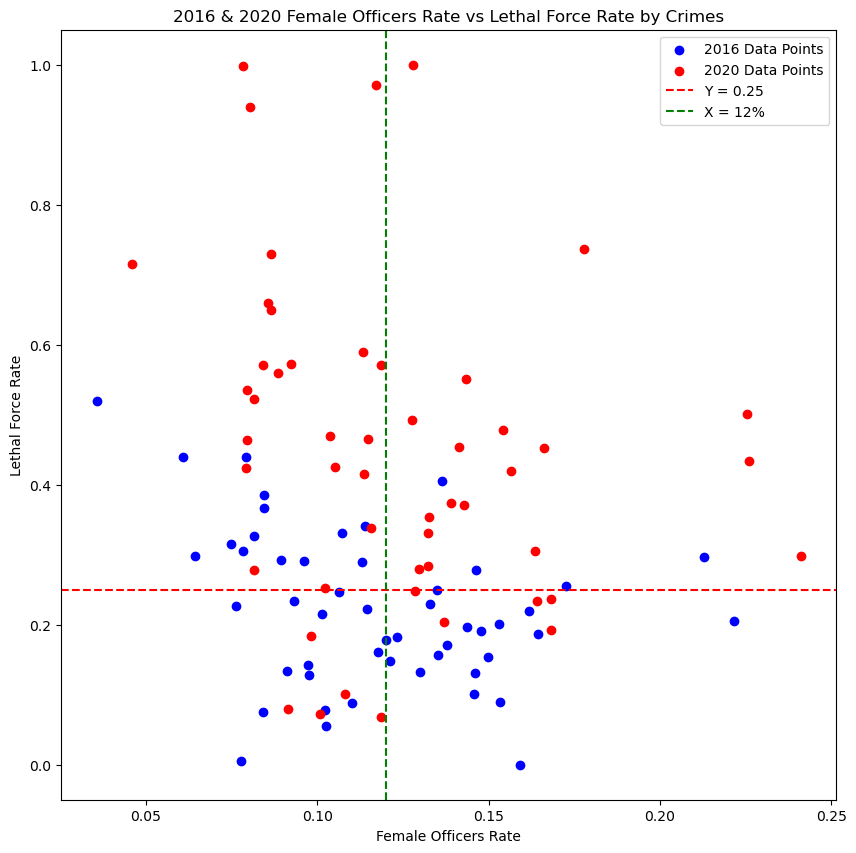

In [111]:
# Figure 4: 2016 & 2020 Female Officers Rate vs Lethal Force Rate by Crimes
plt.figure(figsize=(10, 10))
plt.scatter(data_2016['%_FEMALE'], data_2016['STD_FORCE_TO_CRIME'], color='blue', label='2016 Data Points')
plt.scatter(data_2020['%_FEMALE'], data_2020['STD_FORCE_TO_CRIME'], color='red', label='2020 Data Points')
plt.axhline(y=0.25, color='red', linestyle='--', label='Y = 0.25')
plt.axvline(x=0.12, color='green', linestyle='--', label='X = 12%')
plt.xlabel('Female Officers Rate')
plt.ylabel('Lethal Force Rate')
plt.title("2016 & 2020 Female Officers Rate vs Lethal Force Rate by Crimes")
plt.legend()
plt.show()

Conclusion:

- From Figures 1 & 2, Female Officers Rate and Lethal Force Rate are might not correlated.

- From Figures 3 & 4, Lethal Force Rate are higher in 2020 than 2016. (All the Red Points are higher than the Blue Points)

### Correlation

In [90]:
import seaborn as sns

<Axes: >

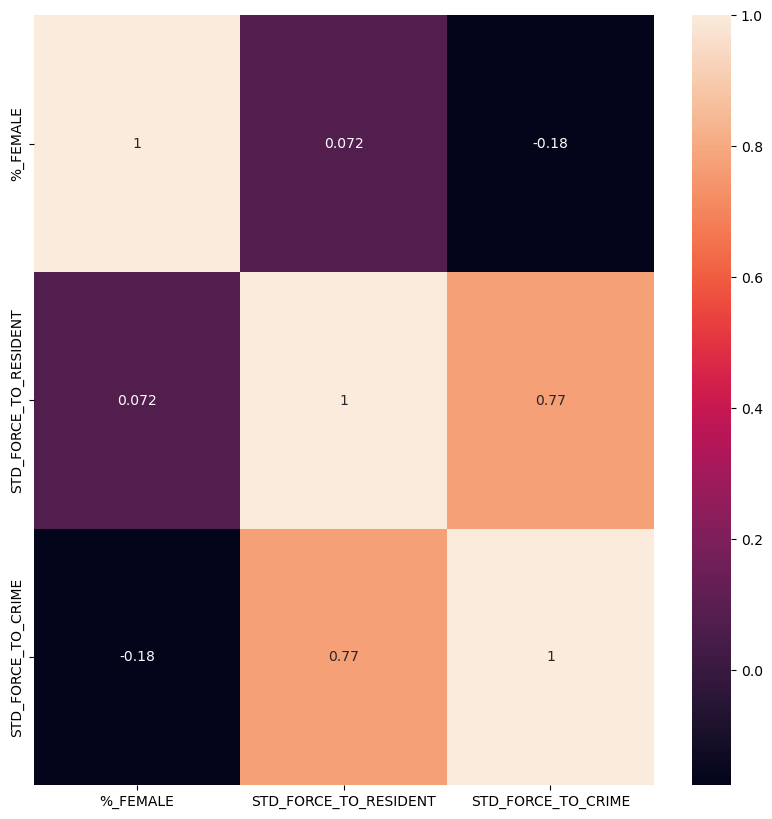

In [103]:
# Correlation Matrix of All Data
corr_matrix = data[['%_FEMALE', 'STD_FORCE_TO_RESIDENT', 'STD_FORCE_TO_CRIME']].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True)

<Axes: >

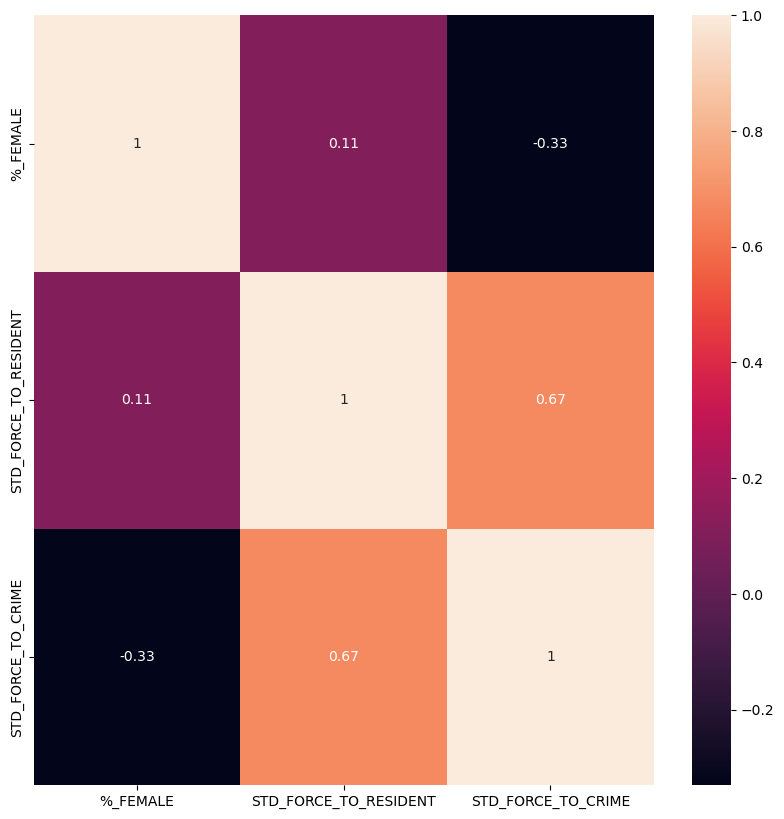

In [104]:
# Correlation Matrix of 2016
corr_matrix = data_2016[['%_FEMALE', 'STD_FORCE_TO_RESIDENT', 'STD_FORCE_TO_CRIME']].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True)

<Axes: >

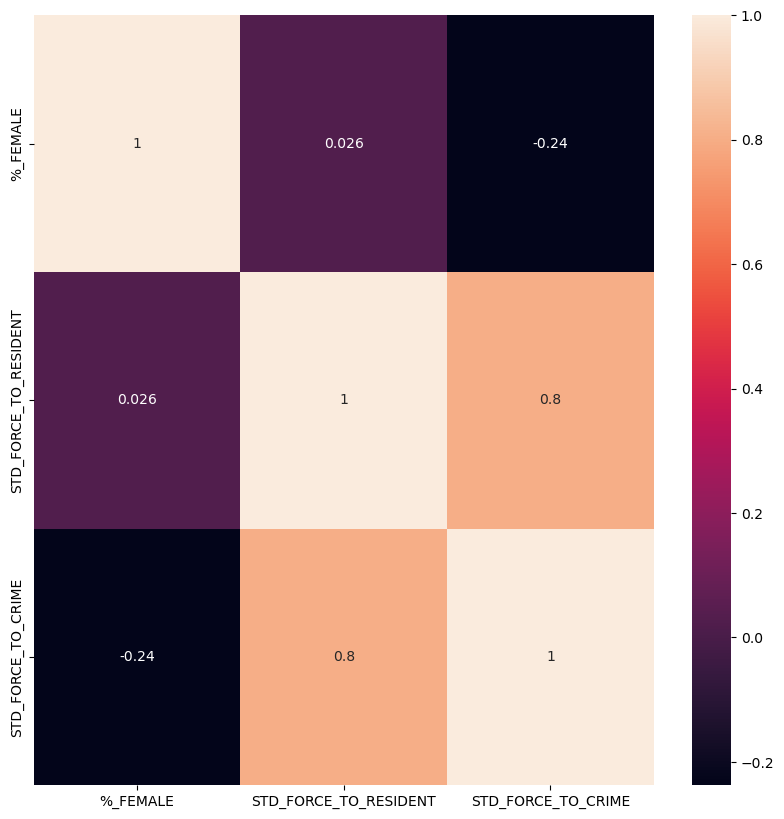

In [105]:
# Correlation Matrix of 2020
corr_matrix = data_2020[['%_FEMALE', 'STD_FORCE_TO_RESIDENT', 'STD_FORCE_TO_CRIME']].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True)

Conclusion:
    
- The relationship between female officers rate and lethal force rate is not linear.